In [1]:
import sympy as sp

# Find the Probability Disttribution of a Function of Random Variables

## Motivating Example

So let's recall our motivating example. We have a random variable Y with a distribution (with $E(Y) = \mu$ and $V(Y) = \sigma$ ). We are trying to study Y and one thing we might try doing is sampling from it repeatedly. This gives us a set of multivariate random variables $Y_1, Y_2, \dots, Y_n$ that are indepdent and identially distributed with $Y$. 

What we might then do is compute statistics from the $Y_i$ for example the mean:

$$ \bar{Y} = \frac{1}{n} Y_1 + \frac{1}{n} Y_2 + \dots + \frac{1}{n} Y_n $$ 

We saw last week that we can show:  

$$ E( \bar{Y}) = \mu $$ 

and 

$$ V(\bar{Y}) = \frac{\sigma}{n} $$



### Further 

To go further though, suppose we want to find an expression for the distribution of $\bar{Y}$:  A probability distribution function if it is discrete, a probability density function if it is continuous, or a cummulative distribution function. What can we say?

## More Generally

More generallly the question we want to answer is:  Given a set of multivariate (possibly dependent) random variables $Y_i$ and a function of these variables $g(Y_1, Y_2, \dots, Y_n)$ is to find a probability distribution describing $g(Y_1, \dots, Y_n)$ as a single random variable. 

We will present three methods for doing this. There are some interesting research questions related to these problems of lifting these ideas to other spaces than the $\mathbb{R}$ and discrete problems we discuss in this class. For example in Physics we are often choosing random locations on a sphere or other surface and then computing a statistic, and one would want to find the distribution produced in those cases.

### Secondary Questions

It would also be interesting for example to know what distributions and functions would produce a particular distribution.

### Motivation

Let me pause and just repeat our motivation. Our ultimate goal is that we have some random variable $Y$ whose distribution is completely unknown to us. We hope to study this distribution by sampling from it and compute statistics from the sample (such as moments). What we would like to then be able to do is to use these computaitons to determine what the distribution of $Y$ is. 

As is usual in mathematics, sometimes the first thing to do in understanding a problem is to work in the opposite direction. So the problem for today:  Given a distribution for $Y$ what can we say about the sample we find?

Then, in thinking about how we actually do sampling, it might turn out that something is wrong. Maybe the members of our sample actually depend on each other. So our question then also becomes if we know the distribution of the multivariable variables including their dependency, can we determine the distribution of the statistics we compute from it. Or if we compute the distribution of the statistics we compute from it, what are clues we would see that would indicate there was dependecy in the sample.

### Statistics

This is the point in the class where you see the question that will motivate the rest of our semester. We have unknown distributions including unkwonwn dependcies and correlations and we want to understand what evidence we would need to reach conclusions about these unknowns. 

**This is exciting:** No other subject taught here at UNC promises something like this. And you also see now why Statistics is a central component to research across the university.

## Methods for Finding Distributions

Problem:  Given a set of multivariate random variables $Y_1, Y_2, \dots, Y_n$ (possibly dependent) and a function $U(Y_1, Y_2, \dots, Y_n)$ there are three methods we will cover for finding the probability distribution of $U$ as a single random variable:

### 1. The Method of Distribution Functions

This is the preferred method when the $Y_i$ have continuous distributions. I find it the most straightforward to explain and ultimately the most general (you will see that the other two methods are specilaizations). 

- Determine the region of $y_1, y_2, \dots, y_n$ space where $U(y_1, y_2, \dots, y_n) < u $.
- Compute $$ F_U(u) = P( U \leq u ) = \iiint \cdots \int_{U \leq u} f(y_1, y_2, \dots, y_n) dy_1 dy_2 \dots dy_n $$ 
- We can then find the density of $u$ by:  
$$ f_U(u) = \frac{dF_U}{du} $$

### Example: Single Variate.

Suppose $Y$ is a random variable distributed with respect to the normal distribution with mean 0 and standard deviation 1. Find the distribution of $U = Y^2$. 

We have the density of $Y$:  $$ f(y) = \frac{1}{\sqrt{2 \pi}} e^{-y^2 / 2} $$

We need to find the region, after fixing $u$, where $$ y^2 < u $$

We see that if $u \leq 0$ then $F_U(u) = 0$.

For $u > 0$ we get:  $$ -\sqrt{u} < y < \sqrt{u} $$

$$ F_U(u) = \int_{-\sqrt{u}}^\sqrt{u} \frac{1}{\sqrt{2\pi}} e^{-y^2/2} dy $$

In [2]:
u = sp.Symbol('u')
y = sp.Symbol('y') 

FU = sp.integrate( 1/sp.sqrt(2*sp.pi) * sp.exp(-y**2/2), (y, -sp.sqrt(u), sp.sqrt(u) ) )
FU

erf(sqrt(2)*sqrt(u)/2)

In [8]:
# FU is the cummulative distribution function, and so to get the denisty we integrate it.

FU.diff(u).expand().simplify()

sqrt(2)*exp(-u/2)/(2*sqrt(pi)*sqrt(u))

$$ \frac{1}{\sqrt{2\pi}} u^{-1/2} e^{-u/2} $$

This is the Gamma distribution with $\alpha = 1/2$ and $\beta = 2$.

In [17]:
 (2**0.5 *sp.gamma(1/2) - sp.sqrt( 2*sp.pi) ).evalf()

1.83285799804592e-16

### Example: Multivariate.

Let $Y_1$ and $Y_2$ be a random sample of size 2 from the uniform distirbution on the interval (0, 1). Find the probability density of $\bar{Y} = \frac12 Y_1 + \frac12 Y_2 $.

We start again with the question, given a fixed $u$ where is 

$$ \frac{1}{2} y_1 + \frac{1}{2} y_2 < u $$

We see here that our cummulative density is 0 for $u<0$ and $u> 1$.  and then will have a different formula for the region $0 < u < 1/2$ and $1/2 < u < 1$.

In [18]:
# 0 < u < 1/2
y1= sp.Symbol('y1')
y2 = sp.Symbol('y2')

sp.integrate( 1, (y2, 0, 2*u-y1), (y1, 0, 2*u) )

2*u**2

In [20]:
# 1/2 < u < 1

FU = sp.integrate( 1, (y2, 0, 2*u-1), (y1, 0, 1) ) + sp.integrate(1, (y1, 0, 2*u-y2), (y2, 2*u-1, 1) )
FU.expand().simplify()

-2*u**2 + 4*u - 1

$$ f(u) = \left\{ \begin{matrix} 4 u & 0 \leq u < 1/2 \\ - 4 u + 4 & 1/2 \leq u < 1 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

### 2. The Method of Transformations

This method is derrived from the Method of Distribution Functions and applies to the case when $U = h(Y)$ is a strictly increasing or decreasing function. It can be generalized to multivariate cases with conditions on the function.

This method relies on the theorem:  Let $Y$ be a random variable with probability density function $f(y)$ and let $h(y)$ be either increasing or decreasing for all $y$ in the support of the density (where $f(y) > 0$). Then $U = h(Y)$ has the density function:

$$f_U(u) = f( h^{-1}(u)) \left| \frac{dh^{-1}}{du} \right| $$


#### Derivation

You can see this derivation by applying the Method of Distribution Functions. Suppose $h(y)$ is strictly increasing, then we know that the region where $h(y) < u$ is given by $y < h^{-1}(u)$ (what changes if $h$ is strictly decreasing?)

$$ F_U(u) = P(U\leq u) = \int_{-\infty}^{ h^{-1}(u) } f(y) dy $$

Then we differentiate $F_U(u)$ with respect to $u$, and using the chain rule have our result.

#### Multivariate Case

To use this method in the multivariate case, you freeze all but one of the variables and find the joint distribution between U and the frozen ones, and then compute the marginal distribution of $U$. 

### Example.

Let $Y_1$ and $Y_2$ be a random sample from the exponential distribution with mean 1. Find the density of $U=\bar{Y} = \frac12 Y_1 + \frac12 Y_2 $

We have the density of $Y$:

$$ f(y) = \left\{ \begin{matrix} e^{-y} & y > 0 \\ 0 & y < 0 \end{matrix} \right. $$

$$ f(y_1, y_2) = e^{-y_1 - y_2} $$

Fix $y_1$ and then $U = \frac12 y_1 + \frac12 Y_2 $ and this is an increasing function of $Y_2$ with 

$$ U = h(Y_2) = \frac12 y_1 + \frac12 Y_2 $$

We find $$h^{-1}(u) = 2u - y_1 $$ provided that $2u > y_1$ (noting that the density is zero for $y_2 < 0$) and therefore

$$ f_{U, Y_1}(u, y_1) = e^{-y_1 - (2u-y_1)} \cdot 2 = 2 e^{-2u} $$

when $2u > y_1$ and 0 otherwise.


and then we get the density of $U$ itself by taking the marginal density of this joint density (i.e. integrating out the $y_1$:

$$ f_U(u) = \int_0^{2u} 2 e^{-2u} dy_1 = 4 u e^{-2u} $$

In [21]:
## Let's do a quick check with Python to make sure this is a valid PDF

u = sp.Symbol('u')
a = sp.Symbol('a')

sp.integrate( 4*u*sp.exp(-2*u), (u, 0, a) )

(-2*a - 1)*exp(-2*a) + 1

In fact you might recognize this as the gamma distribution with $\alpha = 2$ and $\beta = 1/2$. 

### 3. Method of Moment Generating Functions

This method relies on our uniqueness theorem from earlier:  Two random variables with identical moments, or equivalently with identical moment generating functions have the same distribution.

So what this method does is that we compute the moment generating function for $U(Y_1, Y_2, \dots, Y_n) $ and we compare it with the known moment generating functions we have already computed (see the table in our book or various reference sites).  



### Example

Let $Z$ be a standard normal random variable with mean 0 and variance 1. Find the probability distribution of $U = Z^2$ using the moment generating function method.



In [25]:
t = sp.Symbol('t')
z = sp.Symbol('z')

mz2 = sp.integrate( sp.exp( t*z**2 - z**2 /2) / sp.sqrt(2*sp.pi), (z, -a, a) )
mz2

sqrt(2)*Integral(exp(-z**2/2)*exp(t*z**2), (z, -10, 10))/(2*sqrt(pi))

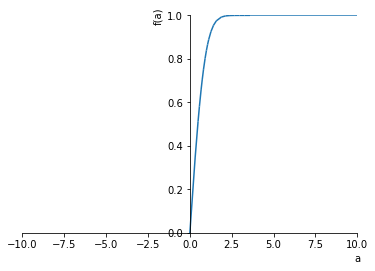

In [ ]:
p = sp.plotting.plot( sp.erf(a), show=False )
p.show()

So we have that 

$$ m_{Z^2}(t) = \left( 1 - 2t \right)^{-1/2} $$

Checking the appendix of our book we see this is the moment generating function of the Gamma distribution with $\alpha = 1/2$ and $\beta = 2$.

Let's check this result using our sampling method from numpy.random:

In [26]:
from numpy.random import standard_normal as standard_normal
import numpy as np
import matplotlib.pyplot as plt

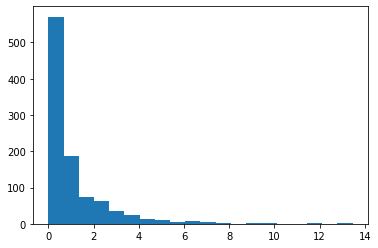

In [27]:
sample = standard_normal(1000)**2
plt.hist( sample, bins=20);